In [109]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.size"] = 15
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [110]:
df = pd.read_csv("../data/embedding_example/embedding-ip4jxt8v.csv").set_index("type")

In [ ]:
df_rsm = pd.read_csv("../data/data.csv")
df_qmof = pd.read_csv("../data/qmof-data.csv")

df_rsm.rename(columns={"cif.label": "mofid"}, inplace=True)
df_qmof.rename(columns={"qmof_id": "mofid"}, inplace=True)

In [ ]:
df_info = pd.concat([df_rsm, df_qmof])

In [ ]:
X = df.values

In [ ]:
pca_obj = PCA(n_components=4, random_state=2020)
pca = pca_obj.fit_transform(X)

In [ ]:
tsne_obj = TSNE(n_components=2, learning_rate=200, random_state=2023, n_jobs=2)
tsne = tsne_obj.fit_transform(pca)

In [ ]:
emb_rsm = tsne[0:len(df_rsm)]
emb_qmof = tsne[len(df_rsm):]

In [ ]:
emb_color = [0] * emb_rsm.shape[0] + [1] * emb_qmof.shape[0]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s=20, edgecolor="None", c=emb_color, alpha=.5)
#plt.scatter(x=emb_rsm[:, 0], y=emb_rsm[:, 1], s=10, edgecolor="None", c="blue", alpha=.5, label="RSM MOF")
#plt.scatter(x=emb_qmof[:, 0], y=emb_qmof[:, 1], s=10, edgecolor="None", c="pink", alpha=.5, label="QMOF")

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

#ax.legend()
plt.show()

In [111]:
df_to_eva = df_info
hash_name = "info.decorated_graph_hash"

In [112]:
vc = df_to_eva[hash_name].value_counts()
vc = vc[vc > 1]
vc

afdf540d3d139dfc0ad9a02e0b0d407c    3
85eb1e598522a1da4458ba59f50345d8    2
752be7fccefd13a1a286cfc543c6d874    2
83f428ebab4ae5aa487fa9dd7809cc1a    2
95248b465cffca8c9c9ed3a342728f05    2
                                   ..
c76e8cf033f8e674b586711b7ef1a8d6    2
58febb8c12209754050873a6c1424518    2
6a8eaf7dfd88fdb781697ea06e4e3e95    2
491c63e14c3df58a46c0ad516bfebb70    2
c6046a5abc5a8ee1837d10a0bccec4b7    2
Name: info.decorated_graph_hash, Length: 162, dtype: int64

In [96]:
groups = []
for hash in list(vc.keys()):
    groups.append(list(df_to_eva[df_to_eva[hash_name] == hash]["mofid"]))

#color_idx = [[df.index.get_loc(name) for name in group] for group in groups]

In [98]:
len(groups)

19

In [99]:
color_idx = []
for group in groups:
    group_idx = []
    for name in group:
        search_name = (name+".cif").rstrip(".cif")
        group_idx.append(df.index.get_loc(search_name))
    color_idx.append(group_idx)

In [104]:
color_list = ["red", "deepskyblue", "orange", "slateblue", "purple", "green", "hotpink", 
        "yellow", "cyan", "lime","darkviolet", "darkcyan", "cornflowerblue",
        "lightcoral", "maroon", "chocolate", "lawngreen", "gold", 
        "olive", "turquoise", "teal", "blue", "slategray", "darkseagreen",
        "mediumblue", "plum", "thistle", "orchid", "black", "lightslategrey", "saddlebrown"
        ]

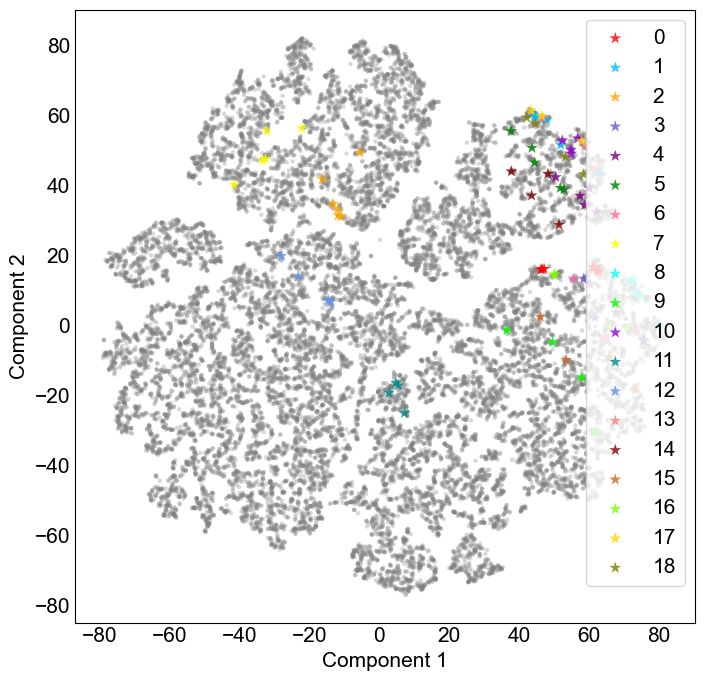

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s=10, edgecolor="None", c="grey", alpha=0.3)
for id, group in enumerate(color_idx):
    if id < len(color_list):
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="*", s=80, edgecolor="None", color=color_list[id], alpha=0.8, label=id)
    elif id < 2 * len(color_list)-1:
        c_id = id - len(color_list)
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="X", s=40, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 3 * len(color_list)-1:
        c_id = id - len(color_list) * 2
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="s", s=40, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 4 * len(color_list)-1:
        c_id = id - len(color_list) * 3
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="P", s=60, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 5 * len(color_list)-1:
        c_id = id - len(color_list) * 4
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="v", s=80, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 6 * len(color_list)-1:
        c_id = id - len(color_list) * 5
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="8", s=80, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 7 * len(color_list)-1:
        c_id = id - len(color_list) * 6
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="3", s=80, color=color_list[c_id], alpha=0.8, label=id)


ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend()

plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2.4854531 , -2.32296404, -2.16047499, -1.99798593, -1.83549687,
        -1.67300782, -1.51051876, -1.3480297 , -1.18554065, -1.02305159,
        -0.86056253, -0.69807348, -0.53558442, -0.37309536, -0.21060631,
        -0.04811725,  0.11437181,  0.27686086,  0.43934992,  0.60183898,
         0.76432803,  0.92681709,  1.08930615,  1.2517952 ,  1.41428426,
         1.57677332,  1.73926237,  1.90175143,  2.06424049,  2.22672954,
         2.3892186 ]),
 <a list of 232 BarContainer objects>)

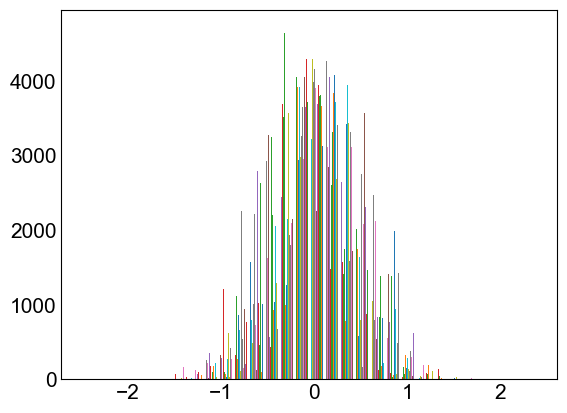

In [115]:
plt.hist(df.values, bins=30)